In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load the dataset
df = pd.read_csv('flood_data.csv') 

In [25]:
df.head()

Rainfall  Temperature  River_Water_Level  Flood_Occurrence
0   4.645041    24.867464           6.541746                 0
1  94.476573     3.656583           8.341446                 1
2  61.062004     2.045169           5.190323                 1
3   2.878268    12.330854           2.995657                 0
4  91.484590     3.842872           9.932550                 1

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rainfall           980 non-null    float64
 1   Temperature        980 non-null    float64
 2   River_Water_Level  980 non-null    float64
 3   Flood_Occurrence   980 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 30.8 KB


In [27]:
# Check for missing values
df.isnull().sum()

Rainfall             0
Temperature          0
River_Water_Level    0
Flood_Occurrence     0
dtype: int64

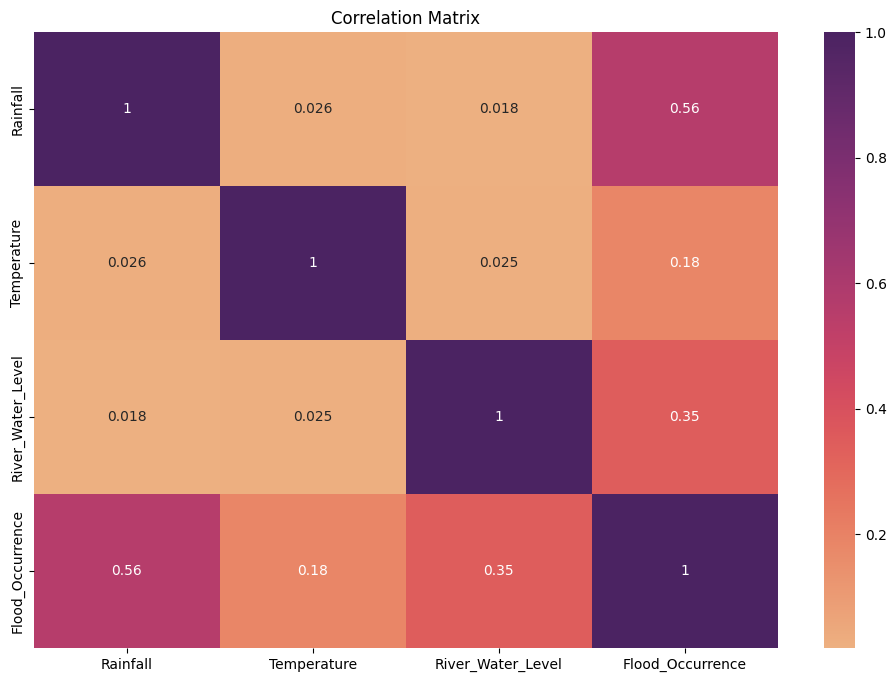

In [28]:
# Correlation matrix
corr_matrix = df.select_dtypes(include=np.number).corr() # Select only numeric columns for correlation calculation

# Visualize correlation using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare')
plt.title('Correlation Matrix')
plt.show()

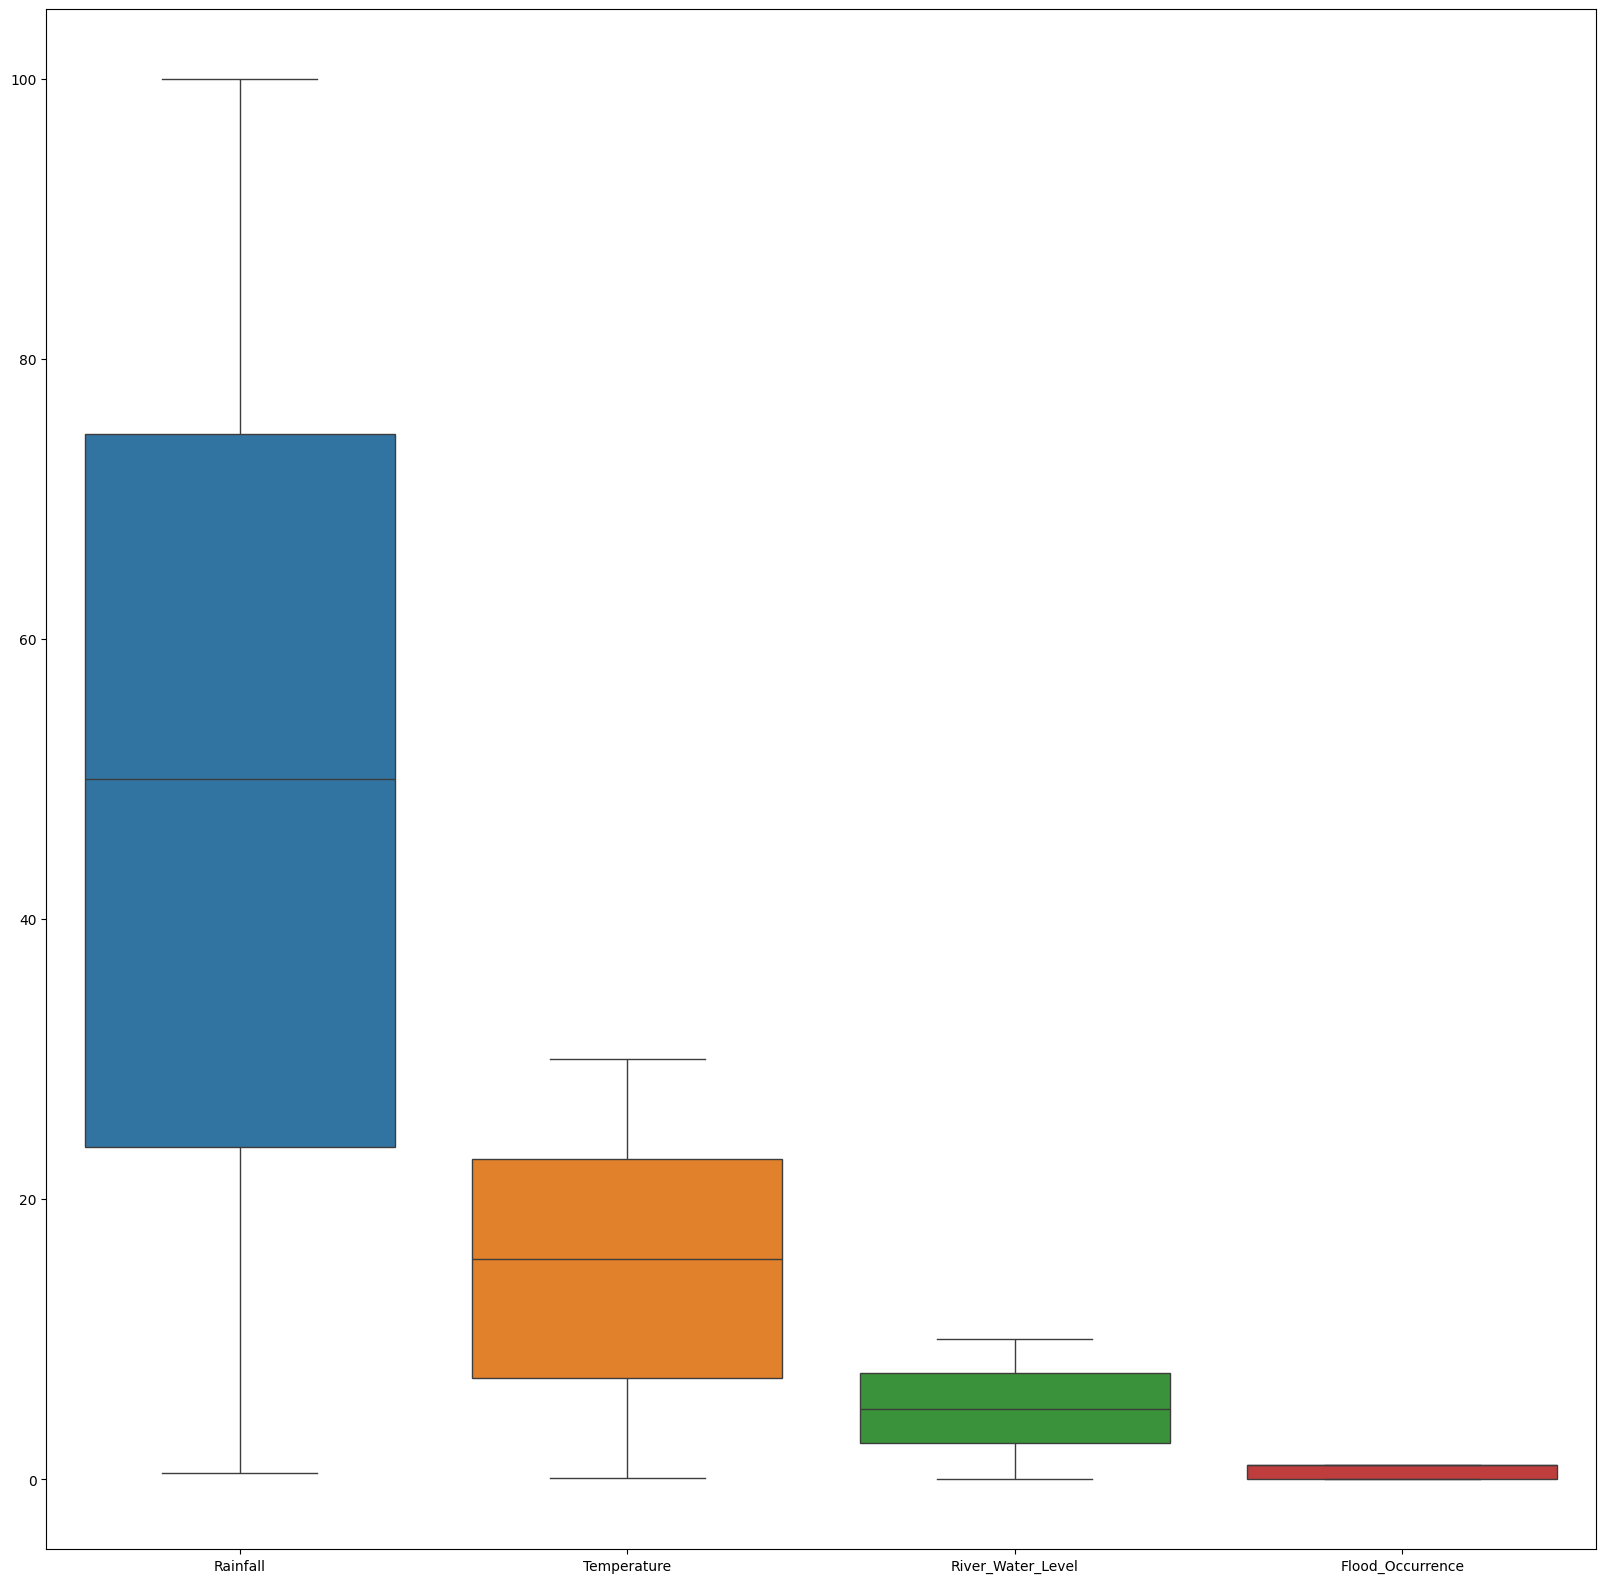

In [29]:
plt.figure(figsize=(20,20))
ax=sns.boxplot(data=df)

In [30]:
 #Here we'll read and remove outlier's in the dataset using zscore matrix
from scipy import stats
z=np.abs(stats.zscore(df))
print(z)

     Rainfall  Temperature  River_Water_Level  Flood_Occurrence
0    1.523797     1.092057           0.524474          1.550090
1    1.551149     1.321606           1.144457          0.645124
2    0.407364     1.504974           0.058919          0.645124
3    1.584274     0.334529           0.697128          1.550090
4    1.448733     1.300407           1.692581          0.645124
..        ...          ...                ...               ...
975  0.184857     0.418324           0.054874          0.645124
976  1.102621     0.602687           1.298908          0.645124
977  1.350161     0.249037           0.231958          1.550090
978  0.289846     0.531769           1.521873          0.645124
979  0.320932     0.362004           1.528987          1.550090

[980 rows x 4 columns]


In [31]:
x = df.drop(columns = ['Flood_Occurrence'])
y = df['Flood_Occurrence']

In [32]:
x

Rainfall  Temperature  River_Water_Level
0     4.645041    24.867464           6.541746
1    94.476573     3.656583           8.341446
2    61.062004     2.045169           5.190323
3     2.878268    12.330854           2.995657
4    91.484590     3.842872           9.932550
..         ...          ...                ...
975  54.561679    18.946807           4.860005
976  16.949275    20.566959           8.789789
977   9.717649    17.459142           4.345960
978  57.628836    10.597542           9.437016
979  39.785560    12.089405           0.580920

[980 rows x 3 columns]

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [35]:
#K - Nearest Neighbor classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(x_train,y_train)
y_pred_knn=knn_classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.9591836734693877

In [36]:
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
score.mean()

np.float64(0.9463323596234989)

In [37]:
'''
#hyper parameter tunning
knn_classifier = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',
                                      metric_params=None, n_jobs=1,n_neighbors=5,p=1,weights='uniform')
knn_classifier.fit(x_train,y_train)
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
y_pred_knn=knn_classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)
#hence accuracy increases after Hyper parameter tunning
'''

"\n#hyper parameter tunning\nknn_classifier = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',\n                                      metric_params=None, n_jobs=1,n_neighbors=5,p=1,weights='uniform')\nknn_classifier.fit(x_train,y_train)\nscore=cross_val_score(knn_classifier,x_train,y_train,cv=10)\ny_pred_knn=knn_classifier.predict(x_test)\naccuracy_score(y_test,y_pred_knn)\n#hence accuracy increases after Hyper parameter tunning\n"

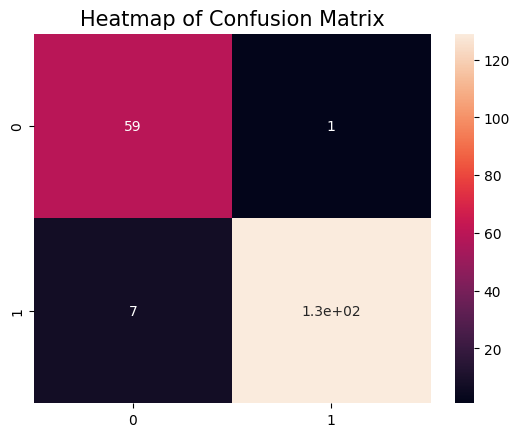

In [38]:
#confusion Metrix using heatmap
cm=confusion_matrix(y_test,y_pred_knn)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [39]:
#printing the classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94        60
           1       0.99      0.95      0.97       136

    accuracy                           0.96       196
   macro avg       0.94      0.97      0.95       196
weighted avg       0.96      0.96      0.96       196



In [40]:
# Random Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20 , criterion = 'entropy', random_state=51)
rf_classifier.fit(x_train,y_train)
y_pred_rf = rf_classifier.predict(x_test)
accuracy_score(y_test,y_pred_rf)

1.0

In [41]:
score=cross_val_score(rf_classifier,x_train,y_train,cv=10)
score.mean()

np.float64(0.9987179487179487)

In [42]:
#confusion Metrix using heatmap
cm=confusion_matrix(y_test,y_pred_rf)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [43]:
#printing the classification report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       136

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196



In [44]:
#XG BOOST
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=23,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
xgb_classifier.fit(x_train, y_train)
y_pred_xgb = xgb_classifier.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

1.0

In [45]:
score=cross_val_score(xgb_classifier,x_train,y_train,cv=10)
score.mean()

np.float64(0.9948717948717949)

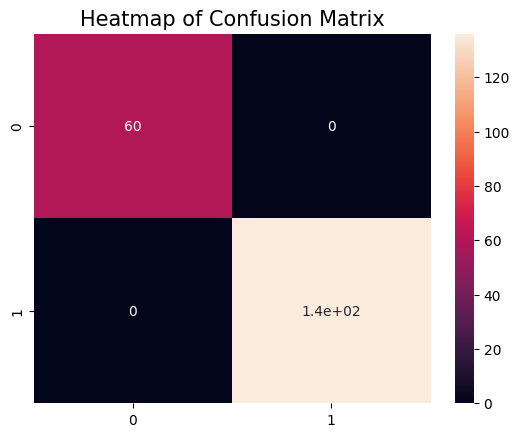

In [46]:
#confusion Metrix using heatmap
cm=confusion_matrix(y_test,y_pred_xgb)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [47]:
#printing the classification report
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       136

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196



In [48]:
#Ada Boosting With random forest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100)
ada_clf.fit(x_train, y_train)

c:\Users\bhanu\.virtualenvs\Severe_Weather_Events-uk_o5pJ0\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=100)

In [49]:
y_pred_adb = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred_adb)

1.0

In [50]:
score=cross_val_score(ada_clf,x_train,y_train,cv=10)
score.mean()

c:\Users\bhanu\.virtualenvs\Severe_Weather_Events-uk_o5pJ0\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\bhanu\.virtualenvs\Severe_Weather_Events-uk_o5pJ0\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\bhanu\.virtualenvs\Severe_Weather_Events-uk_o5pJ0\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\bhanu\.virtualenvs\Severe_Weather_Events-uk_o5pJ0\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (

np.float64(0.9974358974358974)

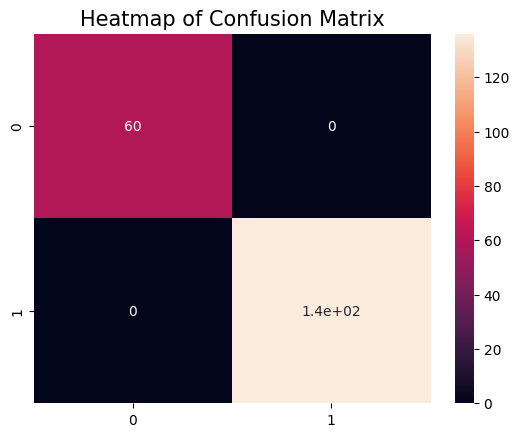

In [51]:
#confusion Metrix using heatmap
cm=confusion_matrix(y_test,y_pred_adb)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [52]:
#printing the classification report
print(classification_report(y_test,y_pred_adb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       136

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196



In [53]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [54]:
y_pred_gbc = gbc_clf.predict(x_test)
accuracy_score(y_test, y_pred_gbc)

1.0

In [55]:
#printing the classification report
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       136

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196



In [56]:
'''
# User input for prediction
rainfall = float(input("Enter Rainfall (in mm): "))
temperature = float(input("Enter Temperature (in °C): "))
river_water_level = float(input("Enter River Water Level (in meters): "))

# Assuming you have a trained KNN model named knn_clf
model = knn_classifier  # Assign the trained KNN model to the variable model

# Predicting Flood Occurrence
predicted_flood = model.predict(np.array([[rainfall, temperature, river_water_level]]))
print(f"Predicted Flood Occurrence: {'Flood is Expected to Occur' if predicted_flood[0] == 1 else 'No Flood is Expected'}")
'''

'\n# User input for prediction\nrainfall = float(input("Enter Rainfall (in mm): "))\ntemperature = float(input("Enter Temperature (in °C): "))\nriver_water_level = float(input("Enter River Water Level (in meters): "))\n\n# Assuming you have a trained KNN model named knn_clf\nmodel = knn_classifier  # Assign the trained KNN model to the variable model\n\n# Predicting Flood Occurrence\npredicted_flood = model.predict(np.array([[rainfall, temperature, river_water_level]]))\nprint(f"Predicted Flood Occurrence: {\'Flood is Expected to Occur\' if predicted_flood[0] == 1 else \'No Flood is Expected\'}")\n'

In [57]:
# ! pip install pickle

In [58]:
import pickle
import os

In [59]:
pickle.dump(knn_classifier,open('model.pkl','wb'))

In [60]:
'''
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)'''

"\nwith open('model.pkl', 'rb') as file:\n    loaded_model = pickle.load(file)"

In [61]:
#print(loaded_model.predict(np.array([[49.224,24.2,5.58]])))